1. Import the necessary libraries: 
You will need to import libraries such as NumPy, pandas, and scikit-learn in order to perform linear regression with the dataset.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from seaborn import get_dataset_names
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from scipy.stats.mstats import winsorize

2. Load the dataset: 
Use pandas to load the dataset into a Pandas DataFrame.

In [2]:
x_train = pd.read_csv('/train.csv', index_col='Id')
x_test = pd.read_csv('test.csv', index_col='Id')

3. Show the datasets and info about it

In [3]:
# x_train.describe()

# x_test.describe()

# x_train.info()

# x_test.info()

# x_test.shape

# x_train.shape

4. Show correlation of the train dataset:

In [4]:
corr = x_train.corr()
corr

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.000000,-0.401322,-0.177721,0.056395,-0.067760,0.034219,0.047130,0.024369,-0.054526,-0.065656,...,-0.002569,0.000911,-0.010861,-0.043236,-0.060054,0.004427,-0.032360,-0.001310,-0.011631,-0.064785
Lot Frontage,-0.401322,1.000000,0.465519,0.193067,-0.081717,0.107988,0.067793,0.190635,0.231022,0.084463,...,0.095940,0.159411,0.002137,0.054426,0.086889,0.226463,0.049916,0.011047,-0.017286,0.333727
Lot Area,-0.177721,0.465519,1.000000,0.087219,-0.033775,0.024504,0.010041,0.115862,0.202157,0.098033,...,0.148884,0.087624,0.017338,0.021210,0.059592,0.108989,0.076077,0.013848,-0.029321,0.260434
Overall Qual,0.056395,0.193067,0.087219,1.000000,-0.091080,0.566351,0.544557,0.433270,0.271766,-0.018735,...,0.260526,0.275401,-0.143527,0.022701,0.060520,0.035310,0.012254,0.014385,-0.015544,0.792383
Overall Cond,-0.067760,-0.081717,-0.033775,-0.091080,1.000000,-0.365390,0.059629,-0.146645,-0.060946,0.024748,...,0.015443,-0.073162,0.059244,0.033878,0.044507,-0.022511,0.034669,-0.014801,0.030952,-0.098217
Year Built,0.034219,0.107988,0.024504,0.566351,-0.365390,1.000000,0.586756,0.316782,0.289678,-0.011203,...,0.246018,0.175510,-0.391063,0.030256,-0.026110,0.002352,-0.005549,0.010216,-0.013563,0.539592
Year Remod/Add,0.047130,0.067793,0.010041,0.544557,0.059629,0.586756,1.000000,0.181575,0.146899,-0.040813,...,0.222399,0.204945,-0.224925,0.043401,-0.025931,-0.017982,0.002412,0.008505,0.032019,0.514574
Mas Vnr Area,0.024369,0.190635,0.115862,0.433270,-0.146645,0.316782,0.181575,1.000000,0.297748,-0.010497,...,0.167936,0.148050,-0.141025,0.027545,0.078443,0.005781,0.059531,0.006012,-0.001685,0.495818
BsmtFin SF 1,-0.054526,0.231022,0.202157,0.271766,-0.060946,0.289678,0.146899,0.297748,1.000000,-0.047154,...,0.218406,0.144526,-0.116817,0.046946,0.099333,0.106295,0.106872,-0.007084,0.020561,0.416927
BsmtFin SF 2,-0.065656,0.084463,0.098033,-0.018735,0.024748,-0.011203,-0.040813,-0.010497,-0.047154,1.000000,...,0.121069,0.005146,0.023200,-0.023012,0.064740,0.027693,-0.007083,-0.010058,0.008733,0.040740


4. Visualize SalePrice:
target

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

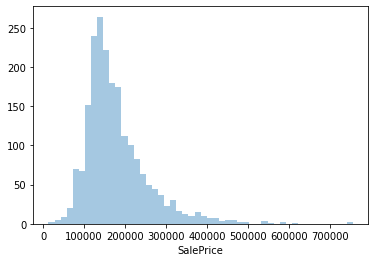

In [5]:
sns.distplot(x_train['SalePrice'], kde=False)

5. Select features and target for the training and test sets

In [6]:
correlation_target = x_train.corr().sort_values('SalePrice', ascending=False)['SalePrice'][:-1]
correlation_target

SalePrice          1.000000
Overall Qual       0.792383
Gr Liv Area        0.699668
Garage Cars        0.640817
Garage Area        0.625989
Total Bsmt SF      0.611201
1st Flr SF         0.605158
Full Bath          0.540405
Year Built         0.539592
Year Remod/Add     0.514574
Garage Yr Blt      0.510925
Mas Vnr Area       0.495818
TotRms AbvGrd      0.483349
Fireplaces         0.470472
BsmtFin SF 1       0.416927
Wood Deck SF       0.337257
Lot Frontage       0.333727
Half Bath          0.298273
Open Porch SF      0.292226
2nd Flr SF         0.291351
Bsmt Full Bath     0.285535
Lot Area           0.260434
Bsmt Unf SF        0.167461
Bedroom AbvGr      0.159038
Screen Porch       0.140020
Pool Area          0.084435
BsmtFin SF 2       0.040740
3Ssn Porch         0.037723
Mo Sold            0.037030
Low Qual Fin SF   -0.010829
Misc Val          -0.016492
Bsmt Half Bath    -0.019311
Yr Sold           -0.046386
MS SubClass       -0.064785
Overall Cond      -0.098217
Kitchen AbvGr     -0

*correlation with the target*

In [7]:
X_train = x_train[['Overall Qual', 'Year Built','1st Flr SF', 'Gr Liv Area', 'Garage Cars']]
X_test = x_test[['Overall Qual','Year Built', '1st Flr SF', 'Gr Liv Area', 'Garage Cars']]
y_train = x_train[['SalePrice']]

#Year Built, 1st Flr SF

# y_test = x_train[['SalePrice']]


In [8]:
X_train.corr()

,Overall Qual,Year Built,1st Flr SF,Gr Liv Area,Garage Cars
Overall Qual,1.000000,0.566351,0.473628,0.562177,0.584149
Year Built,0.566351,1.000000,0.294709,0.200167,0.520357
1st Flr SF,0.473628,0.294709,1.000000,0.568871,0.428382
Gr Liv Area,0.562177,0.200167,0.568871,1.000000,0.473119
Garage Cars,0.584149,0.520357,0.428382,0.473119,1.000000


6. Handle missing values:
- Identify missing values
- Replace missing values with large finite vaue and 0

In [9]:
missing_x = X_train.isnull()
missing_y = y_train.isnull()
missing_x_train = x_train.isnull()
missing_y_train = y_train.isnull()

- Mean values for training data
- Replacing values in the training dataset with the mean value for each feature. 
This is often done as a way to impute missing or invalid values in the dataset.

In [10]:
mean_qual = X_train[['Overall Qual']].mean()
mean_first_flr = X_train[['1st Flr SF']].mean()
mean_gr_liv = X_train[['Gr Liv Area']].mean()
mean_full_bath = X_train[['Year Built']].mean()
mean_gar_cars = X_train[['Garage Cars']].mean()

In [11]:
# Replace infinite values with a large finite value
X_train = X_train.replace(np.inf, 1e10)
y_train = y_train.replace(np.inf, 1e10)
X_test = X_test.replace(np.inf, 1e10)

# Replace NaN values with 0
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)
X_test = X_test.fillna(0)

In [12]:

cols_to_impute = ['Overall Qual', '1st Flr SF', 'Gr Liv Area', 'Year Built', 'Garage Cars']

for col in cols_to_impute:

  mean_val = X_train[col].mean()

  mask = (X_train[col] < 1) | (X_train[col] > 3000)
  
  X_train.loc[mask, col] = mean_val

y_train['SalePrice'] = winsorize(y_train['SalePrice'], limits=[0.01, 0.001])
for col in cols_to_impute:
  X_train[col] = winsorize(X_train[col], limits=[0.03, 0.03])

7. Modelling Linear Regression

In [13]:


lm = LinearRegression().fit(X_train, y_train)

In [14]:

df = pd.concat([X_train, X_test])

In [15]:

y_pred = lm.predict(df)

In [16]:
y_pred

array([[207583.26248615],
       [101119.80712404],
       [162541.53599545],
       ...,
       [145339.67517616],
       [124663.73001991],
       [241152.29963456]])

In [17]:

ids = df.index.tolist()
submission = pd.DataFrame({'Id': ids, 'SalePrice': np.array(y_pred).flatten()})

submission.to_csv('submission.csv', index=False)